In [30]:
from tabula import read_pdf
import tabula
import time
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import seaborn as sns
import re

font_name = font_manager.FontProperties(fname='./malgun.ttf').get_name()
rc('font', family=font_name)

In [13]:
df = tabula.read_pdf('data_missing/미아 사례조사를 통한 행태 및 환경적 측면에서의 미아 발생원인 도출 연구.pdf', pages=3)
tabula.convert_into('data_missing/미아 사례조사를 통한 행태 및 환경적 측면에서의 미아 발생원인 도출 연구.pdf', 'data_missing/미아사례조사.csv', output_format='csv', pages=3)

In [20]:
data = pd.read_csv('./data_missing/미아사례조사.csv', encoding='utf-8', header=None)

## 발생장소

In [55]:
t1 = data.iloc[:13, 0:2]

In [56]:
t1.dropna(inplace=True)
t1.columns = t1.iloc[0, :]
t1.drop([0, 12], axis=0, inplace=True)

In [57]:
t1.columns = ['미아발생장소', '비율']

In [58]:
t1.미아발생장소 = t1.미아발생장소.apply(lambda x: re.sub(' [0-9]{1,}', '', x))

In [59]:
t1['ratio'] = t1.비율.apply(lambda x: float(re.sub('%', '', x)))

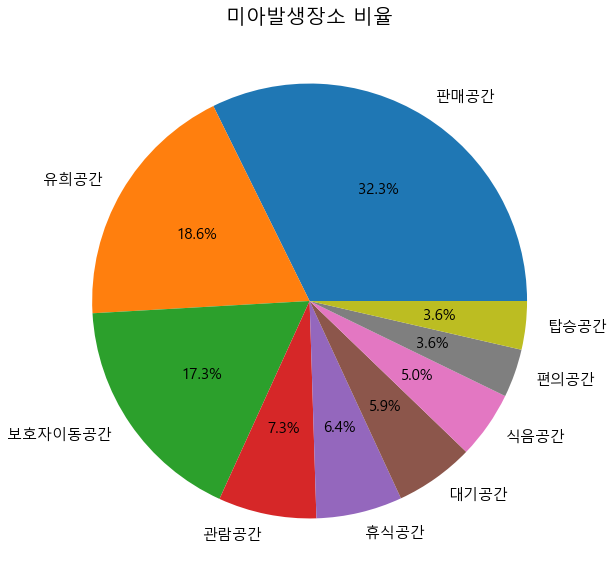

In [76]:
plt.title('미아발생장소 비율', fontsize=20)
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 15
plt.pie(t1['ratio'], labels=t1['미아발생장소'], autopct='%.1f%%')
plt.show()

## 발생요인

In [104]:
t2 = data.iloc[17:, 0:2]

In [106]:
t2.dropna(inplace=True)
t2.columns = t2.iloc[0, :]
t2.drop([17, 30], axis=0, inplace=True)

In [108]:
t2.columns = ['발생원인', '비율']

In [109]:
t2.발생원인 = t2.발생원인.apply(lambda x: re.sub(' [0-9]{1,}', '', x))

In [110]:
t2['ratio'] = t2.비율.apply(lambda x: float(re.sub('%', '', x)))

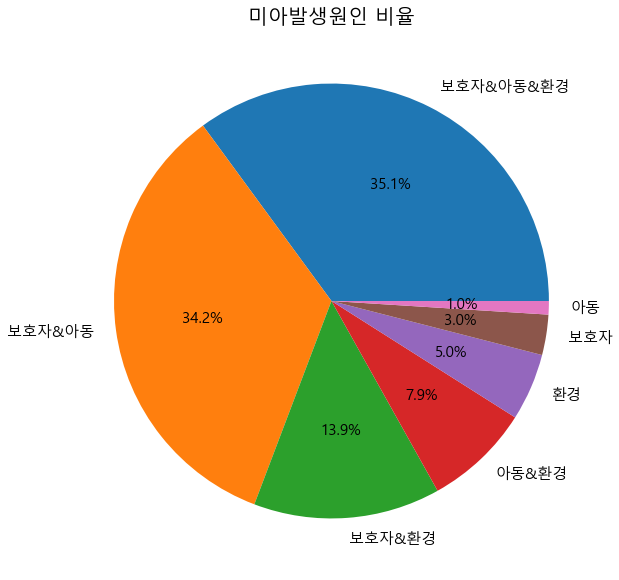

In [111]:
plt.title('미아발생원인 비율', fontsize=20)
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 15
plt.pie(t2['ratio'], labels=t2['발생원인'], autopct='%.1f%%')
plt.show()

## 요인별

In [141]:
import warnings
warnings.filterwarnings('ignore')

f_data = data.iloc[:, 2:]

In [142]:
f_data.dropna(inplace=True)
f_data.drop([30], axis=0, inplace=True)

In [147]:
f_data.columns = ['발생원인', '빈도', '비율', '연령(만)']

In [148]:
f_data

,발생원인,빈도,비율,연령(만)
2,보호자가 아동의 손을 순간적으로 놓은 사이,32,5.7%,3.2
3,아동의 손을 잡지 않은 상황에서 보호자가 다른 곳 본 사이,82,14.6%,3.8
4,보호자가 자리비운 사이,27,4.8%,3.9
6,다른 보호자가 아동을 케어하는 줄 알고,16,2.9%,3.4
7,아동이 보호자를 잘 따라오거나 먼저 길을 잘 찾아갈 것이라 생각,35,6.2%,4.4
8,아동이 흥미요소를 보고 즉흥적으로 이동,45,8.0%,3.8
9,과거 기억에 흥미요소를 인지하고 이동,10,1.8%,3.6
10,이동할 곳으로 아동 혼자 먼저이동 (자기중심성),8,1.4%,2.3
11,보호자도 따라올 것이라 생각하며 아동 혼자이동 (독립성/자주성) 아동,15,2.7%,5.7
12,"보호자가 기다리라고 했는데, 아동이 보호자 찾아 이동 특성",8,1.4%,4.8


### 보호자 부주의

In [161]:
f1 = f_data.iloc[:5, :]

In [163]:
f1['ratio'] = f1.비율.apply(lambda x: float(re.sub('%', '', x)))

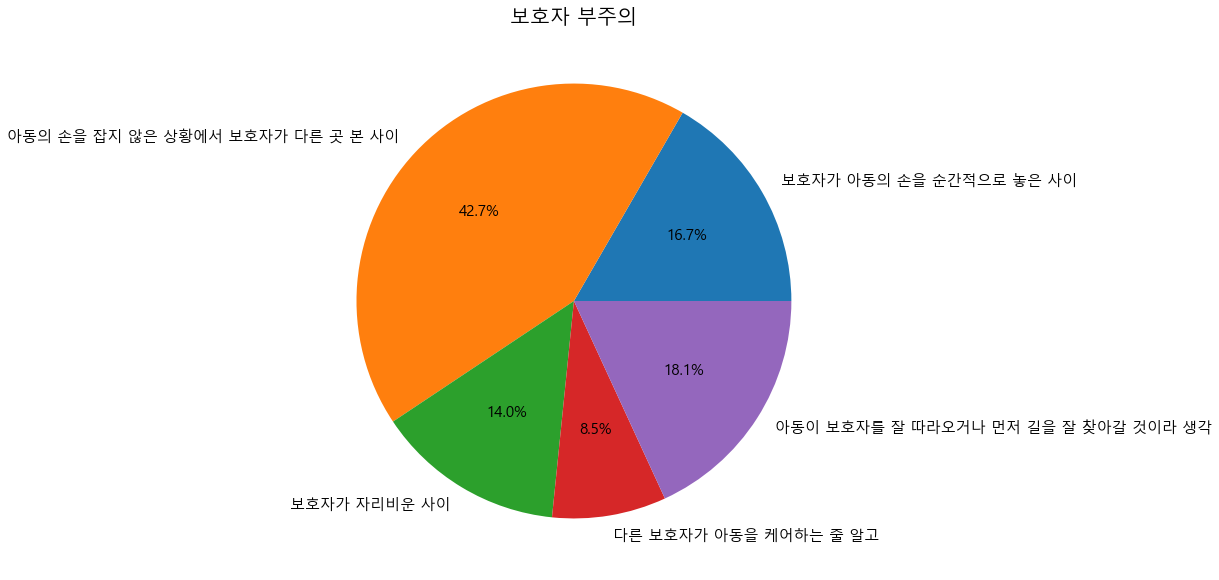

In [166]:
plt.title('보호자 부주의', fontsize=20)
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 15
plt.pie(f1['ratio'], labels=f1['발생원인'], autopct='%.1f%%')
plt.show()

### 아동 특성

In [159]:
f2 = f_data.iloc[5:14, :]

In [167]:
f2['ratio'] = f2.비율.apply(lambda x: float(re.sub('%', '', x)))

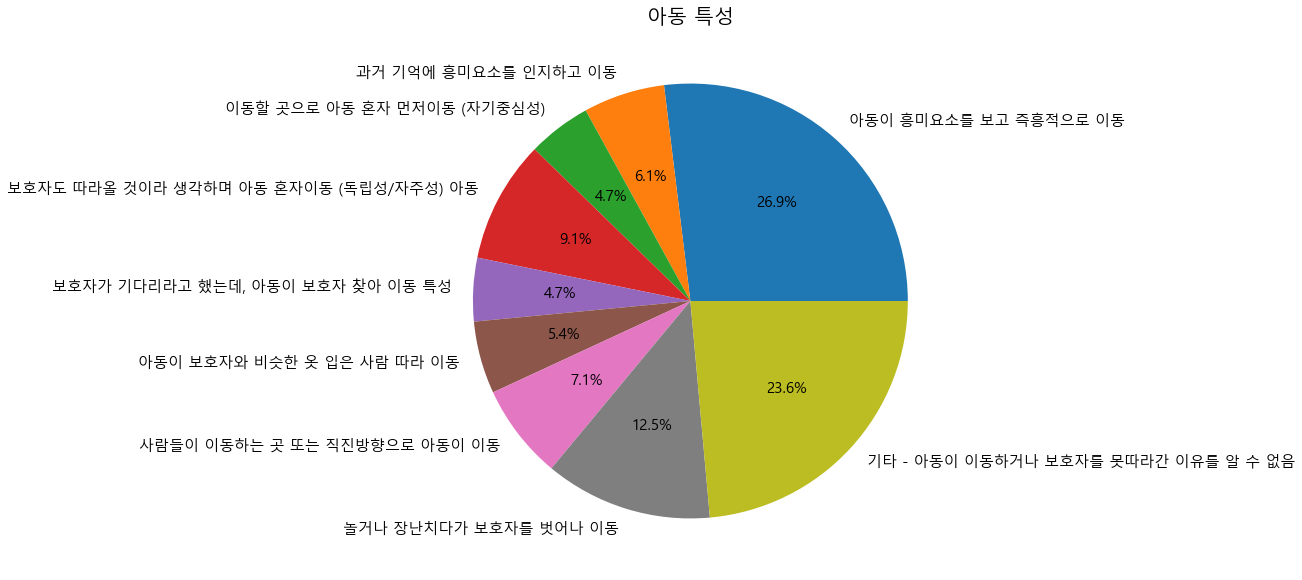

In [168]:
plt.title('아동 특성', fontsize=20)
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 15
plt.pie(f2['ratio'], labels=f2['발생원인'], autopct='%.1f%%')
plt.show()

### 환경적 요인

In [156]:
f3 = f_data.iloc[14:, :]

In [169]:
f3['ratio'] = f3.비율.apply(lambda x: float(re.sub('%', '', x)))

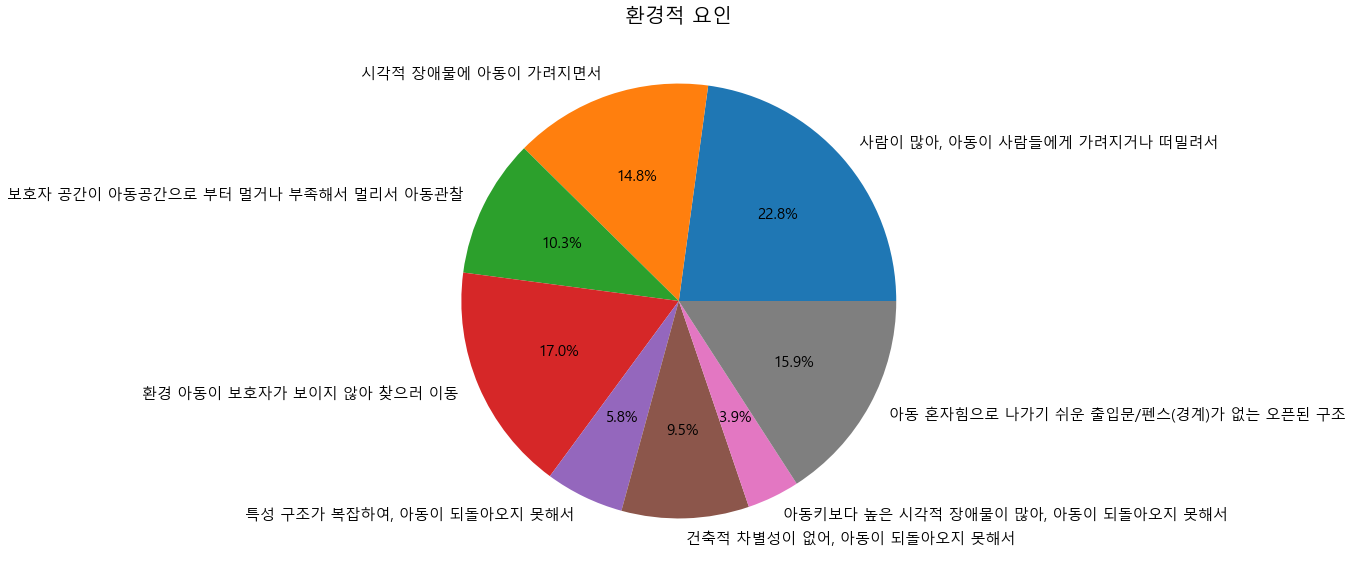

In [170]:
plt.title('환경적 요인', fontsize=20)
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 15
plt.pie(f3['ratio'], labels=f3['발생원인'], autopct='%.1f%%')
plt.show()